# Ridge & Lasso Regression


## Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import load_boston
df=load_boston()

In [5]:
df

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [6]:
dataset = pd.DataFrame(df.data)
print(dataset.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [7]:
dataset.columns = df.feature_names

In [8]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
dataset["Price"]= df.target

In [10]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [15]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [16]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

## Linear Regression

In [48]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 1/3, random_state=0) 

In [49]:
#Fitting the Simple Linear Regression model to the training dataset  
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
model=regressor.fit(x_train, y_train)  

In [50]:
#Prediction of Test set result  
y_pred= regressor.predict(x_test)  


In [51]:
from sklearn.metrics import r2_score
R2_value = r2_score(y_pred,y_test)

In [25]:
print("r squared error on test data ",R2_value)

r squared error on test data  0.5555363370788098


In [26]:
coe_df = pd.DataFrame()

In [27]:
coe_df['Columns name'] = x_train.columns
coe_df['Coefficient value'] = pd.Series(regressor.coef_)
print(coe_df.head(15))

   Columns name  Coefficient value
0          CRIM          -0.118276
1            ZN           0.047734
2         INDUS           0.003102
3          CHAS           2.527552
4           NOX         -17.054016
5            RM           3.670376
6           AGE          -0.010683
7           DIS          -1.591927
8           RAD           0.250607
9           TAX          -0.010858
10      PTRATIO          -1.049858
11            B           0.006081
12        LSTAT          -0.516999


<BarContainer object of 13 artists>

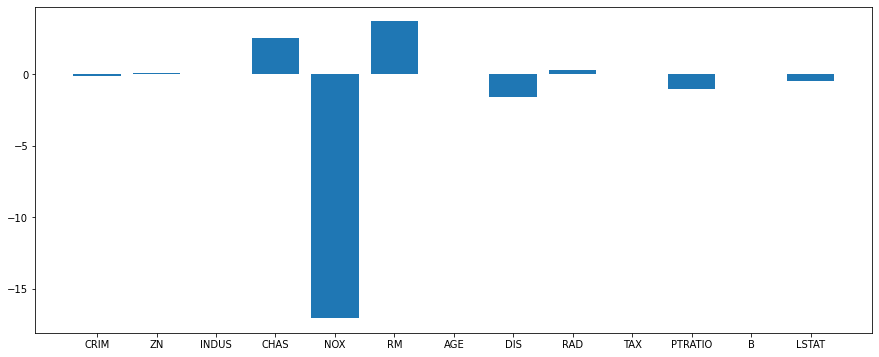

In [28]:
plt.rcParams['figure.figsize'] = (15,6)
plt.bar(coe_df['Columns name'],coe_df['Coefficient value'])

## Ridge Regression

In [41]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.5)
ridge.fit(x_train,y_train)
y_pred = ridge.predict(x_test)
R2_valuer = r2_score(y_pred, y_test)
print('r squared error on test data ', R2_value)

r squared error on test data  0.46907278527668983


   Columns name  Coefficient value
0          CRIM          -0.116231
1            ZN           0.048740
2         INDUS          -0.020360
3          CHAS           2.513399
4           NOX         -11.402704
5            RM           3.707138
6           AGE          -0.016244
7           DIS          -1.517337
8           RAD           0.233307
9           TAX          -0.011188
10      PTRATIO          -0.987156
11            B           0.006390
12        LSTAT          -0.522123


<BarContainer object of 13 artists>

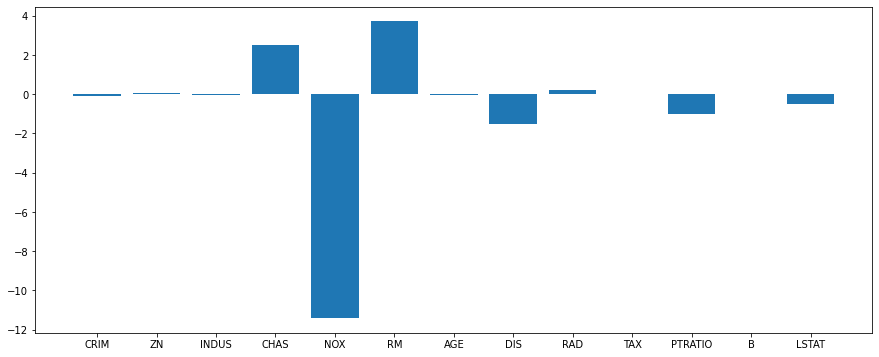

In [42]:
coe_df = pd.DataFrame()
coe_df['Columns name'] = x_train.columns
coe_df['Coefficient value'] = pd.Series(ridge.coef_)
print(coe_df.head(15))
plt.rcParams['figure.figsize'] = (15,6)
plt.bar(coe_df['Columns name'],coe_df['Coefficient value'])

## Lasso

In [43]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.5)
lasso.fit(x_train,y_train)
y_pred = lasso.predict(x_test)
R2_valuel = r2_score(y_pred, y_test)
print('r squared error on test data ', R2_value)

r squared error on test data  0.46907278527668983


   Columns name  Coefficient value
0          CRIM          -0.090797
1            ZN           0.050950
2         INDUS          -0.027213
3          CHAS           0.000000
4           NOX          -0.000000
5            RM           2.323790
6           AGE          -0.004101
7           DIS          -1.068912
8           RAD           0.216663
9           TAX          -0.013652
10      PTRATIO          -0.871150
11            B           0.006931
12        LSTAT          -0.653676


<BarContainer object of 13 artists>

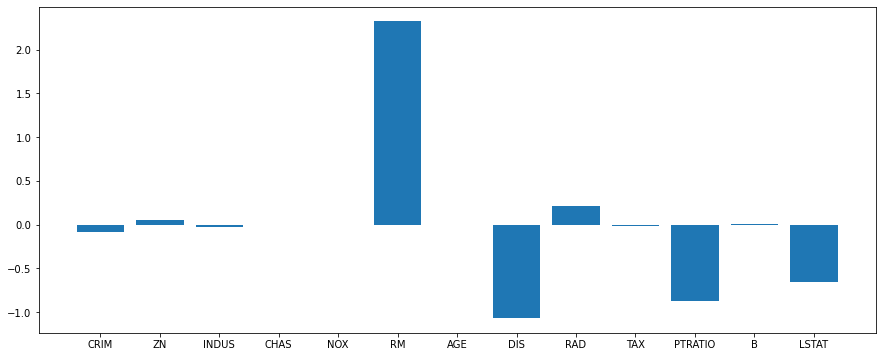

In [44]:
coe_df = pd.DataFrame()
coe_df['Columns name'] = x_train.columns
coe_df['Coefficient value'] = pd.Series(lasso.coef_)
print(coe_df.head(15))
plt.rcParams['figure.figsize'] = (15,6)
plt.bar(coe_df['Columns name'],coe_df['Coefficient value'])

In [52]:
print("Linear R2 score - ",R2_value)
print("Ridge R2 score - ",R2_valuer)
print("Lasso R2 score - ",R2_valuel)

Linear R2 score -  0.5555363370788098
Ridge R2 score -  0.5485363033266056
Lasso R2 score -  0.46907278527668983
